### World Happiness Report

#### Data Description

The World Happiness Report is a landmark survey of the state of global happiness. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The task is to describe how measurements of well-being can be used effectively to assess the progress of nations. 

##### Importing Required Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

##### Loading the dataset

In [78]:
df = pd.read_csv('happiness_score_dataset.csv')

df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


- Below dataframe shows the list of Top five happiest countries in the world

In [79]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


- Below dataframe shows the least five happiest countries in the world

In [80]:
df.tail(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [81]:
df.shape

(158, 12)

##### Data Observations 

There are 158 rows and 12 columns in the provided dataset

In [82]:
pd.set_option('display.max_rows', None)  # This is to display all the data of the dataset

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [84]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### Columns Description:

##### - Country:
This columns shows the name of the countries.

##### - Region:
This shows the region in which the country is located.

##### - Happiness Rank:
It shows the happiness ranks of the countries.

##### - Happiness Score:
It shows the happiness score of the country. It is the sum of all the numerical columns in the dataset.

##### - Standard Error:
The standard error of the happiness score.

##### - Economy (GDP per Capita):
This shows the GDP per capita of the country which contributes to the calculation of happiness score.

##### - Family:
Shows the trust/satisfaction of people with their families and friends.

##### - Health (Life Expectancy):
Life expectancy contributed to the calculation of happiness score.

##### - Freedom:
Perception of freedom in the country.

##### - Trust (Government Corruption):
Corruption level of the country.

##### - Generosity:
Perception of generosity expricenced by the poll takers of the country.

##### - Dystopia Residual
A hypothetical country that has values equal to the world’s lowest national averages for each of the six factors

- So, now our final dataset have 158 rows and 9 columns

#### Data Visualization

In [85]:
# Statistical summary
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


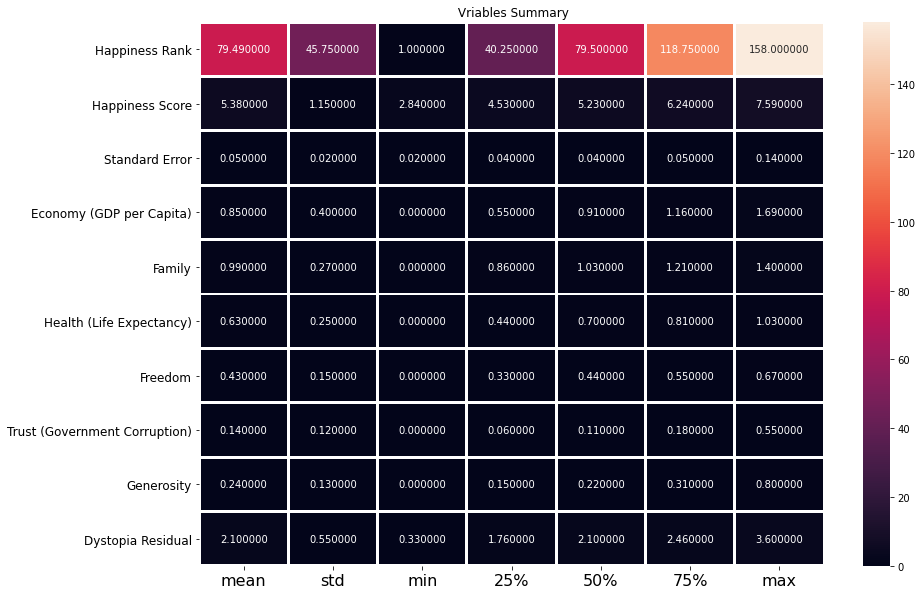

In [86]:
plt.figure(figsize=(14,10))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidths=2,annot=True,fmt="f")
plt.xticks(fontsize = 16)
plt.yticks(fontsize=12)
plt.title(" Vriables Summary")
plt.show()

#### Correlation:

In [87]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


#### Correlation using Heatmap

<AxesSubplot:>

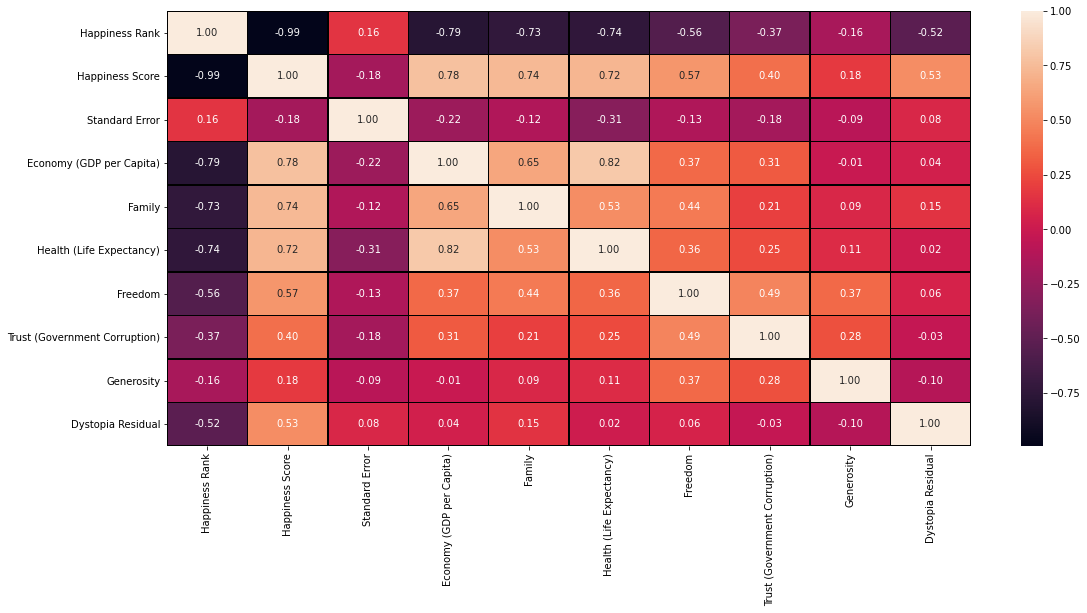

In [88]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt='0.2f')

In [89]:
corr_matrix = df.corr()
corr_matrix["Happiness Score"].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

#### Preprocessing of the dataset

In [90]:
# Checking whether our dataset have any null values.

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

- It shows that there is no null values in the columns of our dataset

In [91]:
# Checking the data type of the dataset

df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [100]:
#Checking the skewness in the dataset
df.skew()

Region                          -0.078949
Happiness Score                  0.185825
Standard Error                   0.965795
Economy (GDP per Capita)        -0.402127
Family                          -0.806265
Health (Life Expectancy)        -0.751660
Freedom                         -0.392372
Trust (Government Corruption)    1.197742
Generosity                       0.663760
Dystopia Residual                0.005932
dtype: float64

Standard Error, Family, Health (Life Expectancy), Trust (Government Corruption) and Generosity shows skewness.

#### Univariate Analysis

Text(0.5, 1.0, 'Cardinality of Region column')

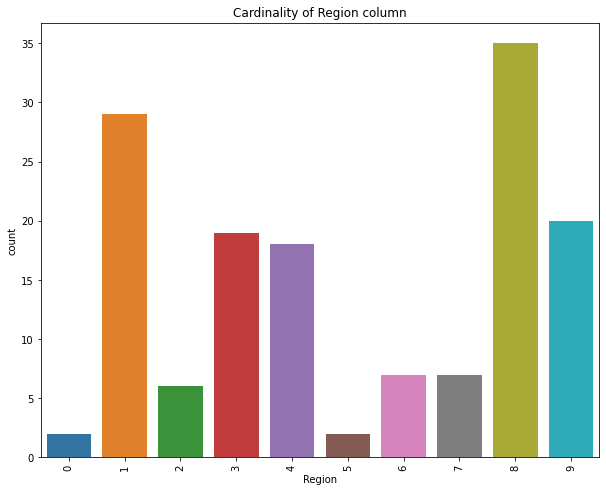

In [101]:
plt.figure(figsize=(10,8))
sns.countplot(df['Region'])
plt.xticks(rotation = 90)
plt.title('Cardinality of Region column')

This clearly shows that Region column has imbalanced categories.

In [103]:
numeric_data=['Happiness Score','Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
print(len(numeric_data))

9


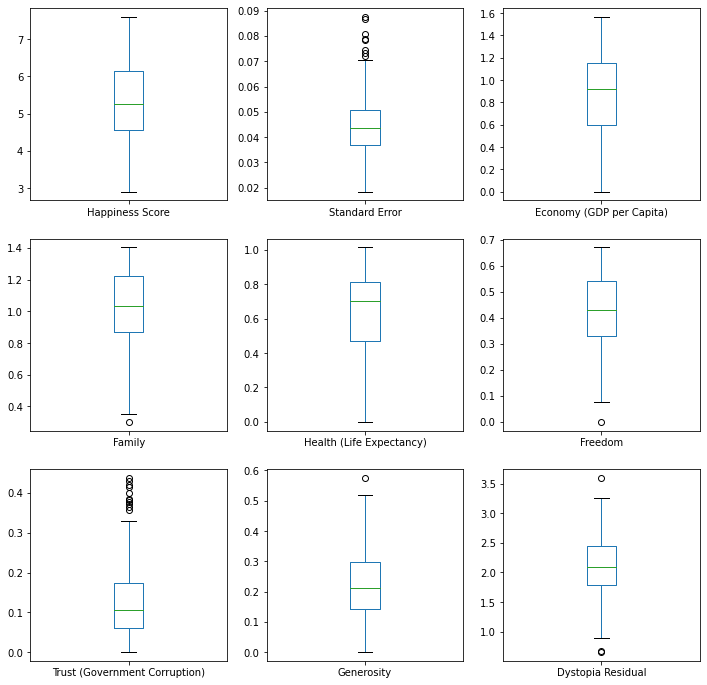

In [105]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_data):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="box",ax=ax[row,col])
    col += 1

THe boxplots shows that there is outliers in the Standard Error, Trust (Government Corruption) and there are very outliers in the Family, Freedom, Generosity and Dystopia Residual

##### Bivariate Analysis

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

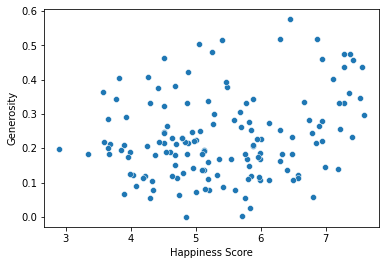

In [106]:
sns.scatterplot(x='Happiness Score',y='Generosity',data=df)

In the scatter plot we found no correlation between Generosity and Happiness Score

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

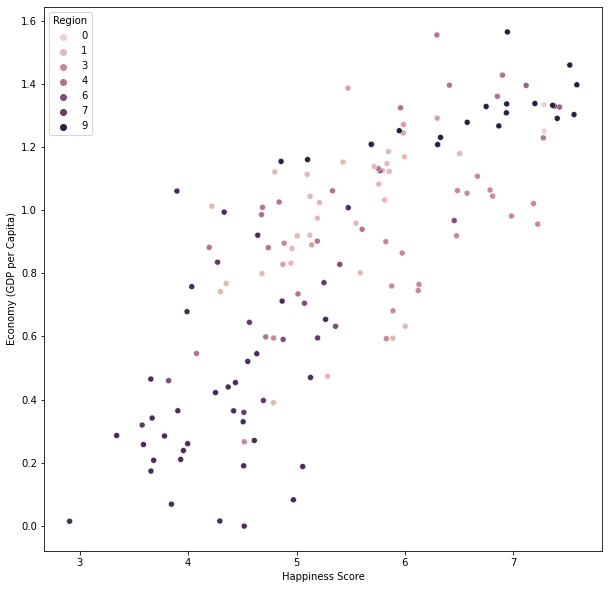

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df,hue='Region')

This shows that there is a positive correlation between Happiness Score and Economy (GDP per Capita) which clearly means if the Economy of a country increases, Happiness score of that country also increases

<Figure size 720x720 with 0 Axes>

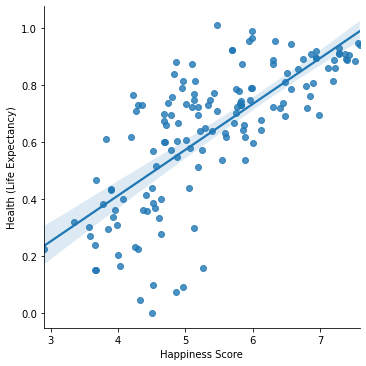

In [108]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

As per the graph there is positive correlation between the Happiness score and Health of the people but outliers are also present.

In [92]:
print(df.shape)
df.drop(['Country','Happiness Rank'],axis=1,inplace=True)
df.shape

(158, 12)


(158, 10)

In [94]:
e=LabelEncoder()

Creationg an instance of labelencoder

In [95]:
# Converting column Region from object to int type

df['Region']=e.fit_transform(df['Region'])
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [97]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

Removing the outliers from the dataset using the zscore

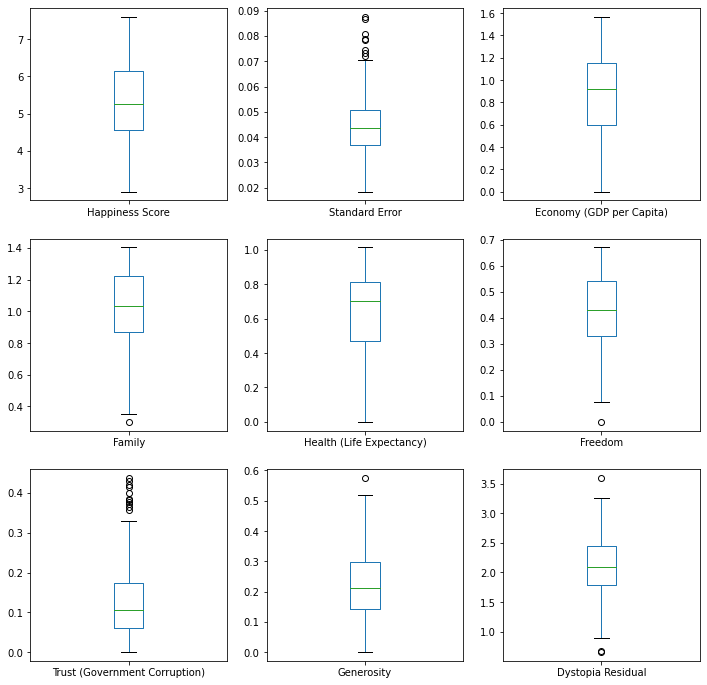

In [109]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_data):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="box",ax=ax[row,col])
    col += 1

There are some outliers present even after removing

In [110]:
# Checking the skewness again

df.skew()

Region                          -0.078949
Happiness Score                  0.185825
Standard Error                   0.965795
Economy (GDP per Capita)        -0.402127
Family                          -0.806265
Health (Life Expectancy)        -0.751660
Freedom                         -0.392372
Trust (Government Corruption)    1.197742
Generosity                       0.663760
Dystopia Residual                0.005932
dtype: float64

Still some skewness is present

In [111]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df)
df=pd.DataFrame(dfpt,columns=df.columns)

In [112]:
df.skew()

Region                          -0.215545
Happiness Score                 -0.015775
Standard Error                  -0.027316
Economy (GDP per Capita)        -0.142969
Family                          -0.156913
Health (Life Expectancy)        -0.194738
Freedom                         -0.072272
Trust (Government Corruption)    0.166600
Generosity                       0.026393
Dystopia Residual                0.018009
dtype: float64

Now the skewness are completely removed

In [50]:
# Spliting the independent and target variable in 'x' and 'y

x = df.drop("Happiness Score", axis = 1)
y = df["Happiness Score"]

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()

In [118]:
xs=scaled.fit_transform(x)
x=pd.DataFrame(xs)
x.head()

,0,1,2,3,4,5,6,7
0,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584


#### Training the dataset

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [123]:
print (f"Regression R2 Score: {model.score(x_test, y_test)}")

Regression R2 Score: 0.9999999151066805
